In [36]:
#Task1: Database setting

#1.(a) For image data, we store them in MongoDB
from pymongo import MongoClient
import urllib

# MongoDB in Docker
mgdb_host = '127.0.0.1'
mgdb_port = '27017'
mgdb_username = ''
mgdb_password = ''
mgdb_database = 'Project'
mgdb_collection = 'blog'

# Establish Connections
client = MongoClient('mongodb://%s/%s' % (mgdb_host, mgdb_database))
mgdb_database = client[mgdb_database]
mgdb_collection = mgdb_database[mgdb_collection]

In [2]:
#Test whether data input is successful
insert_dict = dict()
insert_dict['machine'] = "photo1"
insert_dict['message'] = 'this is just a simple message'
mgdb_collection.insert_one(insert_dict)
print('Insert success')


Insert success


In [3]:
#Delete the test data
mgdb_collection.delete_one({})
print('Delete success')

Delete success


In [24]:
#Access photos from local machine
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(cv2.resize(img,(256,256)))
    return images

In [25]:
photos_PN = load_images_from_folder('/Users/wuguanxun/Desktop/photos/bird_photos/Psilopogon_nuchalis')
photos_PS = load_images_from_folder('/Users/wuguanxun/Desktop/photos/bird_photos/Pycnonotus_sinensis')

In [37]:
#Start insert photo images into MongoDB

def insert_image(image,species,index):
    insert_dict = dict()
    insert_dict['index'] = index
    insert_dict['image'] = (image/255.).tolist()
    insert_dict['species'] = species
    mgdb_collection.insert_one(insert_dict)
    print('Insert success: ',index)

In [38]:
index = 0

for img in photos_PN:
    insert_image(img,'Psilopogon_nuchalis',index)
    index = index+1
for img in photos_PS:
    insert_image(img,'Pycnonotus_sinensis',index)
    index = index+1

Insert success:  0
Insert success:  1
Insert success:  2
Insert success:  3
Insert success:  4
Insert success:  5
Insert success:  6
Insert success:  7
Insert success:  8
Insert success:  9
Insert success:  10
Insert success:  11
Insert success:  12
Insert success:  13
Insert success:  14
Insert success:  15
Insert success:  16
Insert success:  17
Insert success:  18
Insert success:  19
Insert success:  20
Insert success:  21
Insert success:  22
Insert success:  23
Insert success:  24
Insert success:  25
Insert success:  26
Insert success:  27
Insert success:  28
Insert success:  29
Insert success:  30
Insert success:  31
Insert success:  32
Insert success:  33
Insert success:  34
Insert success:  35
Insert success:  36
Insert success:  37
Insert success:  38
Insert success:  39
Insert success:  40
Insert success:  41
Insert success:  42
Insert success:  43
Insert success:  44
Insert success:  45
Insert success:  46
Insert success:  47
Insert success:  48
Insert success:  49
Insert suc

In [ ]:
#1.(b)For metadata derived from data itself, we store them in MySQL

In [ ]:
#Task2: Data Load, Data Preprocessing

#We want:
#(a.) the training data is able to go through sklearn model:Kmeans 
#(we need to flatten each photo image to a 1D-array of size(256*256*3))

#(b.) the training data is able to be selected
#(an index to pick photo we want)

#(c.) the training data and the validation data are capable of passing through CNN from tensorflow

In [40]:
#2.a Prepare data for KMeans

#Fetch data from MongoDB
import pandas as pd
df = pd.DataFrame(list(mgdb_collection.find()))
df

,_id,index,image,species
0,644e34bc9afe4ae9259a0067,0,"[[[0.011764705882352941, 0.3254901960784314, 0...",Psilopogon_nuchalis
1,644e34bc9afe4ae9259a0068,1,"[[[0.09803921568627451, 0.47843137254901963, 0...",Psilopogon_nuchalis
2,644e34bd9afe4ae9259a0069,2,"[[[0.11764705882352941, 0.49019607843137253, 0...",Psilopogon_nuchalis
3,644e34bd9afe4ae9259a006a,3,"[[[0.03137254901960784, 0.13333333333333333, 0...",Psilopogon_nuchalis
4,644e34bd9afe4ae9259a006b,4,"[[[0.00784313725490196, 0.611764705882353, 0.3...",Psilopogon_nuchalis
...,...,...,...,...
306,644e34f09afe4ae9259a0199,306,"[[[0.35294117647058826, 0.403921568627451, 0.3...",Pycnonotus_sinensis
307,644e34f09afe4ae9259a019a,307,"[[[0.6627450980392157, 0.6823529411764706, 0.6...",Pycnonotus_sinensis
308,644e34f09afe4ae9259a019b,308,"[[[0.12156862745098039, 0.3568627450980392, 0....",Pycnonotus_sinensis
309,644e34f09afe4ae9259a019c,309,"[[[0.1411764705882353, 0.3764705882352941, 0.3...",Pycnonotus_sinensis


In [153]:
#We flatten a (256,256,3) array into a 1D-array with size (256*256*3)
#and combine these arrays into a array
from sklearn.model_selection import train_test_split
X = np.array([np.array(img).flatten() for img in df['image']])
train_X, test_X, train_y, test_y = train_test_split(X,df.species,random_state = 100,test_size = 0.3)

In [154]:
#K-means with elbow method
from sklearn.cluster import KMeans

distortion = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(train_X)
    distortion.append(kmeans.inertia_)

/Users/wuguanxun/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wuguanxun/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wuguanxun/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/wuguanxun/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

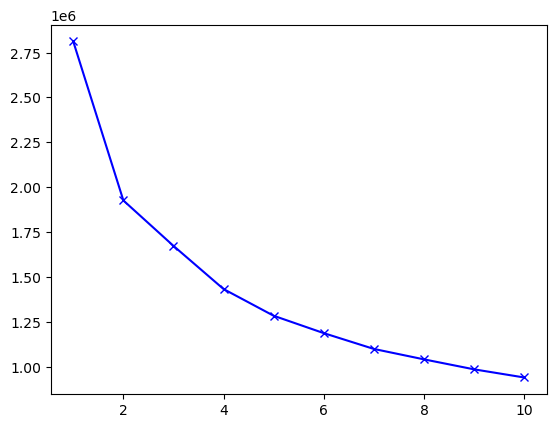

In [244]:
#Plot the elbow!
plt.plot(K,distortion,'bx-')

In [250]:
k = 5
kmeans = KMeans(n_clusters =  k)
kmeans.fit(train_X)

/Users/wuguanxun/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [251]:
centers = kmeans.cluster_centers_
from collections import Counter
dist = Counter(kmeans.labels_)
dist

Counter({4: 25, 1: 95, 2: 45, 3: 28, 0: 24})

In [252]:
closest_per = 50
X_distance = kmeans.transform(X)
representative_X_index = np.argmin(X_distance,axis=0)
representative_X_image = X[representative_X_index]

In [253]:
X_cluster_dist = X_distance[np.arange(len(train_X)),kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)#Choose the sample in the ith cluster
    cluster_distance = X_cluster_dist[in_cluster]#Filter the distance, leave only the distance of sample in ith cluster
    cutoff_distance = np.percentile(cluster_distance,closest_per) #calculate the margin value which distinguish whether or not the sample is the 20th nearest to the center 
    above_cutoff = (X_cluster_dist>cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

part_propagate = (X_cluster_dist != -1)
X_train_progated = train_X[part_propagate]
y_train_progated = train_y[part_propagate]

In [417]:
Unflattened_train_X = np.array([np.array(img.reshape((256,256,3))) for img in train_X])
Unflattened_test_X = np.array([np.array(img.reshape((256,256,3))) for img in test_X])
Unflattened_progated_X = np.array([np.array(img.reshape((256,256,3))) for img in X_train_progated])
#Unflattened_train_X = tf.expand_dims(Unflattened_train_X, axis=-1)
#Unflattened_test_X = tf.expand_dims(Unflattened_test_X, axis=-1)

In [418]:
Unflattened_progated_X.shape

(110, 256, 256, 3)

In [419]:
mapping = {'Psilopogon_nuchalis':0,"Pycnonotus_sinensis":1}
df['species'].map(mapping)

0      0
1      0
2      0
3      0
4      0
      ..
306    1
307    1
308    1
309    1
310    1
Name: species, Length: 311, dtype: int64

In [420]:
train_ds = tf.data.Dataset.from_tensor_slices((Unflatten_train_X, np.array(train_y.map(mapping)))).batch(1)
train_ds_Kmeans = tf.data.Dataset.from_tensor_slices((Unflattened_progated_X, np.array(y_train_progated.map(mapping)))).batch(1)
valid_ds = tf.data.Dataset.from_tensor_slices((Unflattened_test_X,  np.array(test_y.map(mapping)))).batch(1)

In [425]:
train_ds

<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [444]:
#CNN using K-means selected data v.s. CNN the entire training set

num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 3, activation='relu',input_shape = [256,256,3]),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.5),#Regularization
  tf.keras.layers.Dense(num_classes,activation = 'softmax')#binary classification
])


In [447]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model_Kmeans = model

In [448]:
from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_v1.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(min_delta = 0.15,patience = 5,mode = 'min',restore_best_weights = True)
history1 = model.fit(
          train_ds,
          validation_data = valid_ds,
          epochs=20,callbacks = [checkpoint_cb,early_stopping_cb],
          batch_size=1
)

Epoch 1/20


2023-05-01 14:37:55.687821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


214/217 [============================>.] - ETA: 0s - loss: 0.8711 - accuracy: 0.6168

2023-05-01 14:37:59.361789: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


217/217 [==============================] - 5s 19ms/step - loss: 0.8668 - accuracy: 0.6221 - val_loss: 0.7263 - val_accuracy: 0.3085
Epoch 2/20
217/217 [==============================] - 4s 18ms/step - loss: 0.4525 - accuracy: 0.7834 - val_loss: 0.0870 - val_accuracy: 0.9894
Epoch 3/20
217/217 [==============================] - 4s 18ms/step - loss: 0.2416 - accuracy: 0.9171 - val_loss: 0.0510 - val_accuracy: 0.9894
Epoch 4/20
217/217 [==============================] - 4s 17ms/step - loss: 0.1503 - accuracy: 0.9585 - val_loss: 0.1034 - val_accuracy: 0.9787
Epoch 5/20
217/217 [==============================] - 4s 17ms/step - loss: 0.1050 - accuracy: 0.9631 - val_loss: 0.0631 - val_accuracy: 0.9894
Epoch 6/20
217/217 [==============================] - 4s 17ms/step - loss: 0.0584 - accuracy: 0.9770 - val_loss: 0.0283 - val_accuracy: 0.9894
Epoch 7/20
217/217 [==============================] - 4s 17ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 1.0000


In [449]:
from tensorflow import keras
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_KNN.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(min_delta = 0.15,patience = 5,mode = 'min',restore_best_weights = True)
history2 = model_KNN.fit(
          train_ds_Kmeans,
          validation_data = valid_ds,
          epochs=20,callbacks = [checkpoint_cb,early_stopping_cb],
          batch_size=1
)

Epoch 1/20
110/110 [==============================] - 2s 21ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0454 - val_accuracy: 0.9787
Epoch 2/20
110/110 [==============================] - 2s 19ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0611 - val_accuracy: 0.9787
Epoch 3/20
110/110 [==============================] - 2s 20ms/step - loss: 0.0442 - accuracy: 0.9818 - val_loss: 0.0404 - val_accuracy: 0.9894
Epoch 4/20
110/110 [==============================] - 2s 20ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0897 - val_accuracy: 0.9894
Epoch 5/20
110/110 [==============================] - 2s 20ms/step - loss: 4.2046e-04 - accuracy: 1.0000 - val_loss: 0.0607 - val_accuracy: 0.9894
Epoch 6/20
110/110 [==============================] - 2s 20ms/step - loss: 2.6860e-05 - accuracy: 1.0000 - val_loss: 0.0582 - val_accuracy: 0.9894


In [ ]:
#xAI(perhaps?)